## 딥러닝

### 심층신경망

In [36]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [37]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전 장에서 다운로드 했기 때문에 다시 다운로드 하지 않음

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
train_input =train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [40]:
# 스케일링
scaler =StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [41]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [42]:
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


##### 심층신경망 만들기1

In [43]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [44]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [45]:
# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 심층신경망 만들기2

In [46]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [47]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [49]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4655 - accuracy: 0.8370
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3567 - accuracy: 0.8719
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3206 - accuracy: 0.8851
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2955 - accuracy: 0.8931
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2779 - accuracy: 0.8986
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2607 - accuracy: 0.9061
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2450 - accuracy: 0.9117
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2319 - accuracy: 0.9161
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2196 - accuracy: 0.9219
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/step - l

In [50]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.8%

375/375 [==============================] - 0s 891us/step - loss: 0.8755 - accuracy: 0.8783


[0.8754860162734985, 0.878250002861023]

In [57]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 947us/step


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [60]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [76]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    # plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

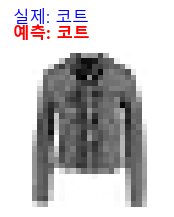

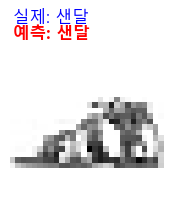

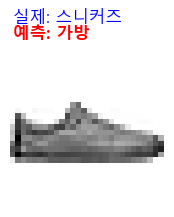

In [79]:
for i in range(10, 13):
    show_image(i)

#### 렐루 함수
- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못만듬

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수

    <img src="../image/ml011.png" width=500>

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할 때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [88]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fasion_NMIST_RELU')

In [89]:
model2.summary()

Model: "Fasion_NMIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [91]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [92]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target =train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [93]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [97]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5292 - accuracy: 0.8141
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3946 - accuracy: 0.8581
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3559 - accuracy: 0.8730
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3330 - accuracy: 0.8800
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3177 - accuracy: 0.8872
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3046 - accuracy: 0.8913
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2951 - accuracy: 0.8954
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2874 - accuracy: 0.8992
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2792 - accuracy: 0.9011
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.271

In [99]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid함수 사용시 0.01% 개선

375/375 [==============================] - 0s 885us/step - loss: 0.4106 - accuracy: 0.8817


[0.41055968403816223, 0.8817499876022339]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [100]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fasion_NMIST_RELU')

In [ ]:
# 모델3 설정, 최적화는 adam클래스만 사용할 것!
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# 모델 훈련. 모델 훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1852 - accuracy: 0.9325
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1809 - accuracy: 0.9337
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1801 - accuracy: 0.9334
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1750 - accuracy: 0.9349
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1694 - accuracy: 0.9375
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1646 - accuracy: 0.9392
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1643 - accuracy: 0.9390
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1582 - accuracy: 0.9415
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1552 - accuracy: 0.9439
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.150

optimizer 사용시 0.01 정도 개선

In [ ]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% - 7정도 차이

375/375 [==============================] - 0s 897us/step - loss: 0.3393 - accuracy: 0.8859


[0.339329332113266, 0.8859166502952576]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림. 

In [105]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fasion_NMIST_RELU')

In [107]:
model4.summary()

Model: "Fasion_NMIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
# 모델3 설정, 최적화는 adam클래스만 사용할 것!
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [109]:
# 모델 훈련
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5998 - accuracy: 0.7879
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4433 - accuracy: 0.8394
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4105 - accuracy: 0.8505
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3873 - accuracy: 0.8594
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3688 - accuracy: 0.8658
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3584 - accuracy: 0.8697
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3488 - accuracy: 0.8706
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3354 - accuracy: 0.8753
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3326 - accuracy: 0.8782
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.325

In [111]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1차이(훈련과 검증 사이에 차이가 거의 없음)

375/375 [==============================] - 0s 900us/step - loss: 0.3164 - accuracy: 0.8852


[0.31641289591789246, 0.8852499723434448]

- 드롭아웃하면 정확도가 떨어짐 -> 훈련과 검증(테스트) 사이에 정확도 차이가 줄어듬
- `과대적합`(훈련세트 훈련에 너무 치중하여서 검증보다 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터만 저장하는 두가지 방법이 존재

In [112]:
# 모델 4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [113]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야함

In [123]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'),
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fasion_NMIST_RELU5')

In [115]:
model5.load_weights('./model4-weight.h5')

In [118]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 849us/step


- 모델까지 전부 생성해주는 방법

In [119]:
model6 = keras.models.load_model('./model4-whole.h5')

In [120]:
model6.summary()

Model: "Fasion_NMIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 898us/step - loss: 0.3482 - accuracy: 0.8814


[0.3482031524181366, 0.8813999891281128]

#### 콜백
- 실행 도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용

In [122]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fasion_NMIST_RELU7')

In [124]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [125]:
# 에포크마다 모델 저장기능 콜백
checkpoin_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True)  # 최고 상태면 저장
# 조기종료 콜백
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)   # 두번이상 훈련값이 동일하면 조기종료, 이전 최고상태로 복구

In [127]:
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoin_cb, early_stopp_cb])

Epoch 1/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3456 - accuracy: 0.8717 - val_loss: 0.3505 - val_accuracy: 0.8734
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3336 - accuracy: 0.8764 - val_loss: 0.3338 - val_accuracy: 0.8789
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3277 - accuracy: 0.8799 - val_loss: 0.3250 - val_accuracy: 0.8834
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3191 - accuracy: 0.8817 - val_loss: 0.3301 - val_accuracy: 0.8799
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3154 - accuracy: 0.8822 - val_loss: 0.3179 - val_accuracy: 0.8833
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.8860 - val_loss: 0.3242 - val_accuracy: 0.8863
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3027 - accuracy: 0.8877 - val_loss: 0.3240 - val_accuracy:

- 20번 중 7번 반복에서 조기종료

In [128]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 984us/step - loss: 0.3179 - accuracy: 0.8833


[0.3179425597190857, 0.8833333253860474]

In [129]:
model7.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 891us/step - loss: 0.3476 - accuracy: 0.8764


[0.34755638241767883, 0.8763999938964844]

In [130]:
early_stopp_cb.stopped_epoch

6

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하강법), RMSprop... 

- `드롭아웃` : 밀집층의 뉴련을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것